In [191]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
from pandas import melt, pivot_table
import pandas as pd
from datetime import datetime
import seaborn as sb
import numpy as np

In [192]:
covid = load_data('covid19_full')
covid

[data] https://data.hossam.kr/data/lab06/covid19_full.xlsx
[desc] 2020년 2월 5일부터 2023년 5월 31일까지 서울과 전국의 Covid19 확진자 현황을 일단위로 기록한 실제 데이터 (자체수집)
[!] Cannot read metadata


,날짜,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망
0,2023-05-31,6204277,5987.0,0,NaN,NaN,6492,6.0,31703511.0,24411.0,0,NaN,17.0,34784
1,2023-05-30,6198290,3326.0,0,NaN,NaN,6486,1.0,31679100.0,13529.0,0,NaN,7.0,34767
2,2023-05-29,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
3,2023-05-28,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
4,2023-05-27,6191196,4078.0,0,NaN,NaN,6485,0.0,31647238.0,17796.0,0,NaN,3.0,34784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,2020-02-09,10,0.0,10,0.0,0.0,0,NaN,27.0,0.0,24,3.0,NaN,0
1208,2020-02-08,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0
1209,2020-02-07,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0
1210,2020-02-06,11,0.0,11,0.0,0.0,0,NaN,24.0,0.0,23,1.0,NaN,0


In [193]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   날짜          1212 non-null   object 
 1   서울시 누적 확진자  1212 non-null   int64  
 2   서울시 일일 확진   1211 non-null   float64
 3   서울시 치료중     1212 non-null   int64  
 4   서울시 퇴원      770 non-null    float64
 5   서울시 추가 퇴원   770 non-null    float64
 6   서울시 누적 사망   1212 non-null   int64  
 7   서울시 일일 사망   458 non-null    float64
 8   전국 누적 확진    1212 non-null   float64
 9   전국 일일 확진    1211 non-null   float64
 10  전국 치료중      1212 non-null   int64  
 11  전국 퇴원       770 non-null    float64
 12  전국 당일 사망    458 non-null    float64
 13  전국 누적 사망    1212 non-null   int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 132.7+ KB


In [194]:
#1.
c_df = pd.DataFrame(covid, columns=['날짜', '서울시 누적 확진자', '서울시 일일 확진', '서울시 치료중', '서울시 퇴원', '서울시 추가 퇴원', '서울시 누적 사망', '서울시 일일 사망', '전국 누적 확진', '전국 일일 확진', '전국 치료중', '전국 퇴원', '전국 당일 사망', '전국 누적 사망'] )
c_df


,날짜,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망
0,2023-05-31,6204277,5987.0,0,NaN,NaN,6492,6.0,31703511.0,24411.0,0,NaN,17.0,34784
1,2023-05-30,6198290,3326.0,0,NaN,NaN,6486,1.0,31679100.0,13529.0,0,NaN,7.0,34767
2,2023-05-29,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
3,2023-05-28,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
4,2023-05-27,6191196,4078.0,0,NaN,NaN,6485,0.0,31647238.0,17796.0,0,NaN,3.0,34784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,2020-02-09,10,0.0,10,0.0,0.0,0,NaN,27.0,0.0,24,3.0,NaN,0
1208,2020-02-08,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0
1209,2020-02-07,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0
1210,2020-02-06,11,0.0,11,0.0,0.0,0,NaN,24.0,0.0,23,1.0,NaN,0


In [195]:
# 2. 
covid['날짜'] = pd.to_datetime(covid['날짜'])
covid

,날짜,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망
0,2023-05-31,6204277,5987.0,0,NaN,NaN,6492,6.0,31703511.0,24411.0,0,NaN,17.0,34784
1,2023-05-30,6198290,3326.0,0,NaN,NaN,6486,1.0,31679100.0,13529.0,0,NaN,7.0,34767
2,2023-05-29,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
3,2023-05-28,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
4,2023-05-27,6191196,4078.0,0,NaN,NaN,6485,0.0,31647238.0,17796.0,0,NaN,3.0,34784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,2020-02-09,10,0.0,10,0.0,0.0,0,NaN,27.0,0.0,24,3.0,NaN,0
1208,2020-02-08,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0
1209,2020-02-07,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0
1210,2020-02-06,11,0.0,11,0.0,0.0,0,NaN,24.0,0.0,23,1.0,NaN,0


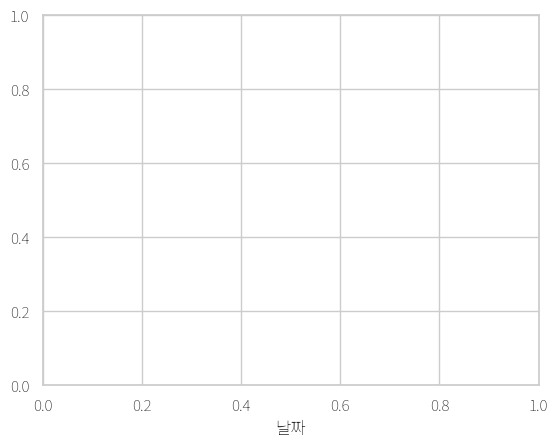

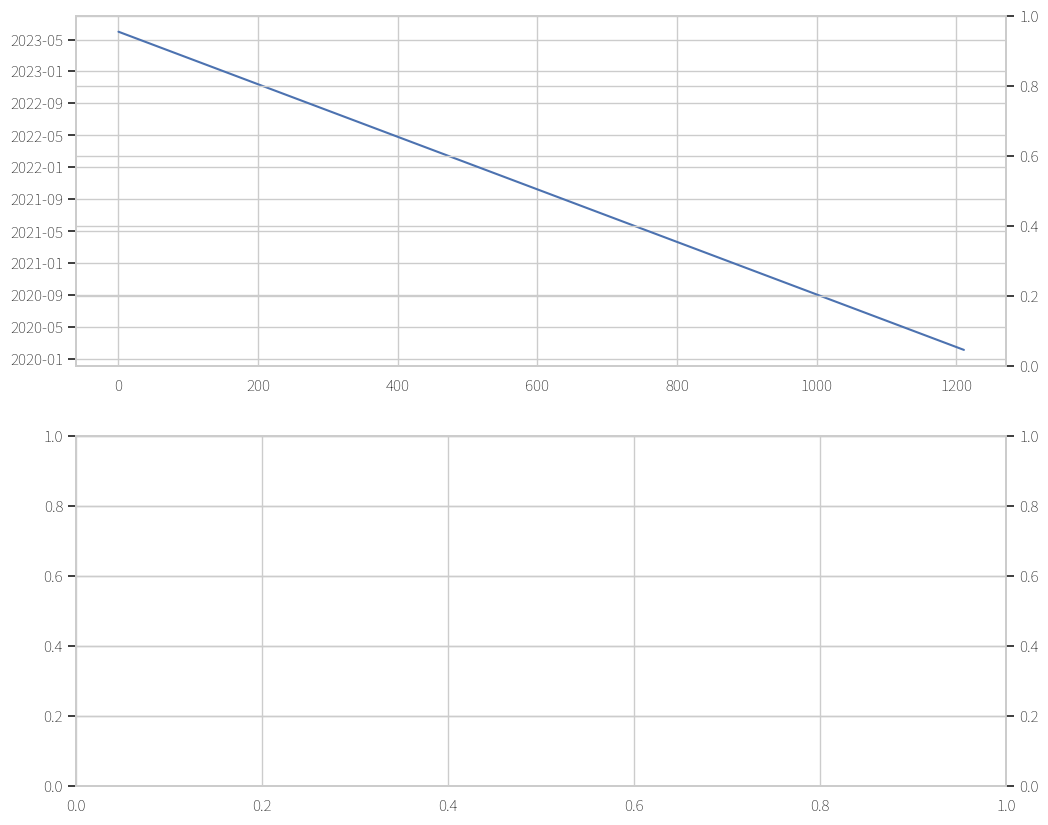

In [196]:
#3.
plt.xlabel('날짜')

fig, axes = plt.subplots(2,1, figsize=(12,10))

# 첫 번째 서브플롯
ax1 = axes[0]
ax1_t= ax1.twinx()

ax2= axes[1]
ax2_t = ax2.twinx() 

ax1.plot(covid['날짜'])

ValueError: Date ordinal 56530458.6 converts to 156745-02-20T14:24:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

Error in callback <function _draw_all_if_interactive at 0x000001E9E4196840> (for post_execute), with arguments args (),kwargs {}:


ValueError: Date ordinal 56530458.6 converts to 156745-02-20T14:24:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

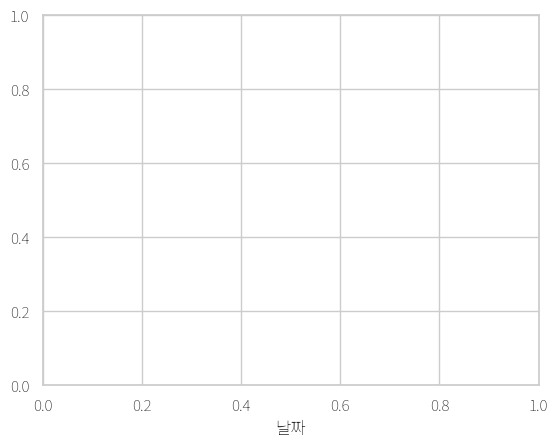

ValueError: Date ordinal 56530458.6 converts to 156745-02-20T14:24:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 1200x1000 with 4 Axes>

In [197]:
#4.

plt.xlabel('날짜')

fig, axes = plt.subplots(2,1, figsize=(12,10))

# 첫 번째 서브플롯
ax1 = axes[0]
ax1_t= ax1.twinx()

ax2= axes[1]
ax2_t = ax2.twinx() 

ax1.plot(covid['날짜'])


# 서울시 누적 확진자=막대그래프
ax1.bar(
    covid['날짜'], covid['서울시 누적 확진자'], color='Purple', label='서울시 누적 확진자'
)

ax1_t.plot(
    covid['날짜'],
    covid['서울시 누적 확진자'],
    color='black',
    label='서울시 일일 확진자'
)

ax1.set_title('서울시 누적 확진자 & 일일 확진자 추이')
ax1.set_ylabel('누적 확진자_막대')
ax1_t.set_ylabel('일일 확진자_선그래프')

# 범례 표시
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_t.get_legend_handles_labels()
ax1.legend(lines1 + lines2,labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
my_dpi = 200
my_font_name = "Noto Sans Kr"
my_theme = "whitegrid"

sb.set_theme(style=my_theme) 
# 화풍 설정하기

plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False


SyntaxError: keyword argument repeated: fontsize (3562473450.py, line 24)

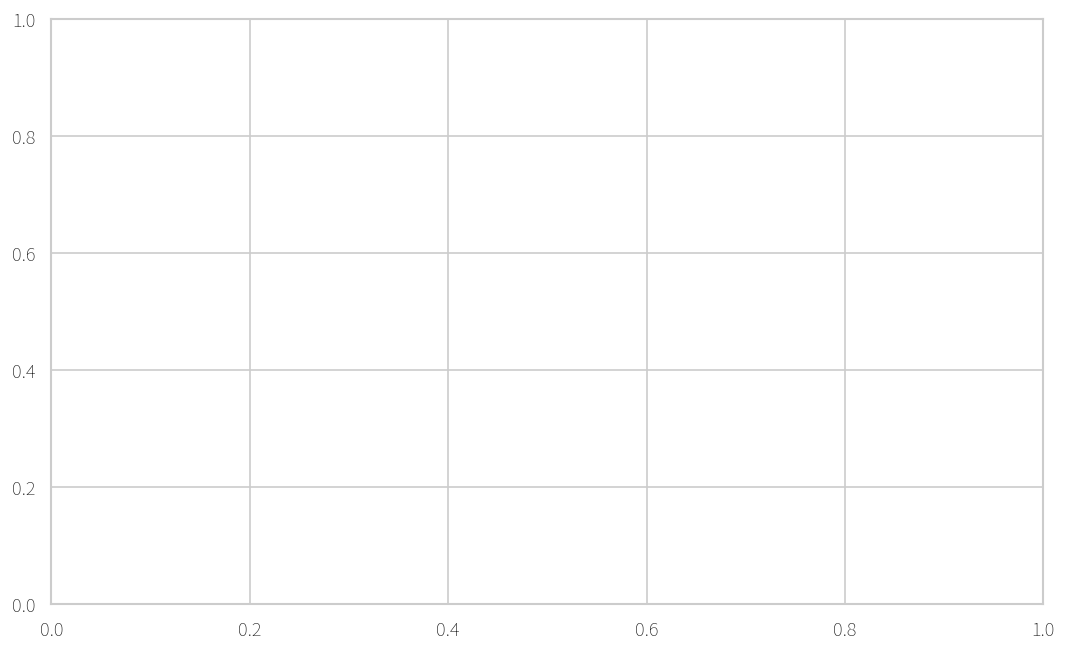

In [ ]:
# 5.
width_px = 1280
height_px = 760
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

ax2 = axes[1]
ax2_twin= ax2.twinx()

ax2.bar(covid['날짜'],covid['전국 누적 확진'], color = '#000000' , label = '전국 누적 확진')

ax2_t.plot(covid['날짜'], covid['전국 일일 확진'], color = '#000000', linewidth=1.5, label='전국 일일 확진')

ax2.set_title('전국 누적 확진자 & 일일 확진자 추이')
ax2.set_ylabel('누적 확진자(막대)')
ax2_twin.set_ylabel('일일 확진자(선 그래프)')

lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 +labels2, loc='upper left')

ax.set_title("covid", color = "#000000", fontsize = 12, fontsize=12, pad=8)
ax.set_xlabel("covid", color ="#000000", fontsize=8, labelpad=5 )
ax.set_ylabel("covid", color="#000000", fontsize=8, labelpad=5)
plt.grid()
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
width_px = 1280
height_px = 760
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.histplot(data=⭐, x="⭐", hue="⭐", bins="⭐",edgecolor="#000000",linewidth0.5)
           

ax.set_title("⭐", color = "⭐", fontsize = 12, fontsize=12, pad=8)
ax.set_xlabel("⭐", color ="⭐", fontsize=8, labelpad=5 )
ax.set_ylabel("⭐", color="⭐", fontsize=8, labelpad=5)
ax.set_xlim([⭐,⭐])
ax.set_ylim([⭐,⭐])
plt.grid()
plt.tight_layout()
plt.savefig("plot.png", dpi=my_dpi*2)
plt.show()
plt.close()